In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
n = 100 
ma_params = [0.4, -0.2] # 이동평균 계수 
residuals = np.random.normal(0, 1, n) # 전차 생성


# MA(2) 모델 생성
data = [0 , 0]
for i in range(2, n) :
    data.append(ma_params[0] * residuals[i - 1] + ma_params[1] + residuals[i-2] + residuals[i])
    
df = pd.DataFrame({
    'Value' : data
})

print(df)

       Value
0   0.000000
1   0.000000
2  -1.861840
3   0.477149
4  -1.270576
..       ...
95  1.946202
96 -0.781408
97 -2.431211
98 -1.322161
99 -2.103529

[100 rows x 1 columns]


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -150.166
Date:                Tue, 25 Jul 2023   AIC                            308.333
Time:                        13:47:31   BIC                            318.754
Sample:                             0   HQIC                           312.550
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0106      0.254     -0.042      0.967      -0.509       0.488
ma.L1          0.3918     13.982      0.028      0.978     -27.012      27.796
ma.L2          1.0000     71.404      0.014      0.9

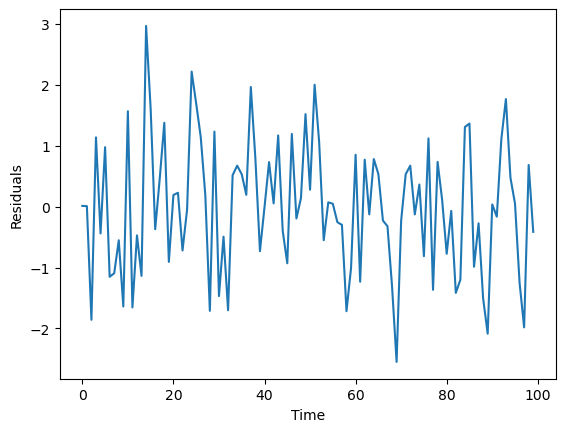

In [3]:
model = ARIMA(df['Value'], order=(0,0,2))
results = model.fit()

print(results.summary())

plt.plot(results.resid)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()